# Сборный проект

# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Изучение общей информации

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
try:
    data = pd.read_csv('/Users/666/Documents/Data Analysis/Проекты/df/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


### ищем пропуски и дубликаты

In [6]:
data.isna().sum().sort_values()

Platform              0
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Name                  2
Genre                 2
Year_of_Release     269
User_Score         6701
Rating             6766
Critic_Score       8578
dtype: int64

In [7]:
(data.isna().mean() * 100).sort_values()

Platform            0.000000
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Name                0.011965
Genre               0.011965
Year_of_Release     1.609333
User_Score         40.089740
Rating             40.478612
Critic_Score       51.319174
dtype: float64

In [8]:
data.duplicated().sum()

0

# Предобработка данных

### приводим к нижнему регистру 

In [9]:
data.columns = data.columns.str.lower()

### для изменения типа данных необходимо сначала избавится от неконвертируемых значений

In [10]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

tbd - значит будет определено, можно заменить на NaN

In [11]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [12]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

шаблон без параметра возвращает рейтинг RP, тоже заменим на NaN

In [13]:
data.loc[data['rating'] == 'RP', 'rating'] = np.nan

In [14]:
data['rating'] = data['rating'].fillna('rating pending')

Тут необходимо заполнить пропуски, для построения графиков

### удалаяем пропуски

In [15]:
data.shape

(16715, 11)

Самым простым решением обработки данных, безусловно, является исключение некомплектных наблюдений, содержащих пропуски, и дальнейший анализ полученных таким образом «полных» данных. 
Однако понятно, что такой подход приводит к сильному различию статистических выводов, сделанных при наличии в данных пропусков и при их отсутствии. Поэтому более перспективным является иной путь – заполнение пропусков перед анализом фактических данных. Этот подход имеет явные преимущества: ясное представление структуры данных; вычисление необходимых итоговых значений; уверенная интерпретация результатов анализа, так как можно опираться на традиционные характеристики и суммарные значения. Выбор метода заполнения пропусков является непростой задачей, и зависит от различных факторов: наличия регулярных компонент и их особенностей, причин возникновения пропусков в данных и характера этих пропусков (случайный или нет), а также особенностей данных и проводимого исследования

In [16]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,rating pending
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,rating pending


In [17]:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,rating pending
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,rating pending


Видим что строки с пропущенным именем и жанром совпадают и платформа нас не интересует, предлагаю удалить

In [18]:
data[data['year_of_release'].isna()].sort_values(by='na_sales', ascending=False).head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,rating pending
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,rating pending
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,rating pending
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T


С годом выпуска ситуация иная, в спортивных симуляторах год выпуска указан в названии, возможно поэтому столбец был проигнорирован при заполнении. Столбцы где в названии присутствует год можно заполнить вручную. Проведя анализ было принято решение оставить пропуски, не смотря на то что их доля незначительна. В выборке присутствуют игры AAA класса, их отсутствие при дальнейшем анализе может повлиять на выводы

In [19]:
data = data.dropna(subset=['name', 'genre']).reset_index(drop=True)

Тут я решил избавиться от игр без названия, потому что эти данные не восстановить и они составляют незначительную часть от общего обьема. Если жанр и год можно заполнить, найдя информацию в интернете по названию, имя игры по имеющимся данным не получить. Поэтому предлагаю все таки исключить безымянные проекты из выборки

In [20]:
data.shape

(16713, 11)

### меняем тип данных, приводим значения к единому формату

In [21]:
data['user_score'] = (data['user_score'].astype(float)) *10

### считаем суммарные продажи во всех регионах

In [22]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [23]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,rating pending,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,rating pending,31.38


# Исследовательский анализ

### смотрим количество выпущенных игр по годам

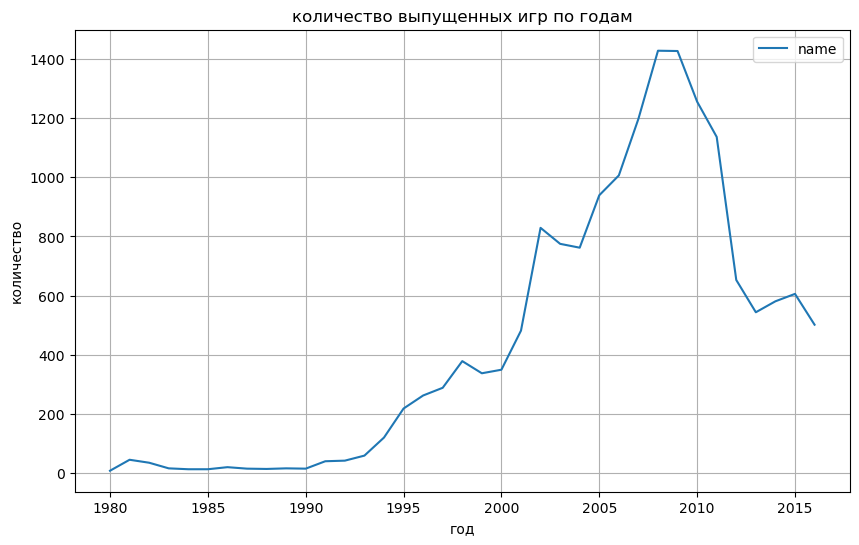

In [24]:
data.pivot_table(
    index='year_of_release', values='name', aggfunc='count'
).plot(
    title='количество выпущенных игр по годам',
    xlabel='год',ylabel='количество',
    figsize=(10, 6),grid=True    
)
plt.show()

На графике можно наблюдать резкий рост количества выпущенных игр с конца 90-ых годов до начала 10-ых, я связываю это с популяризацией ЭВМ

### смотрим изменение продаж по платформам

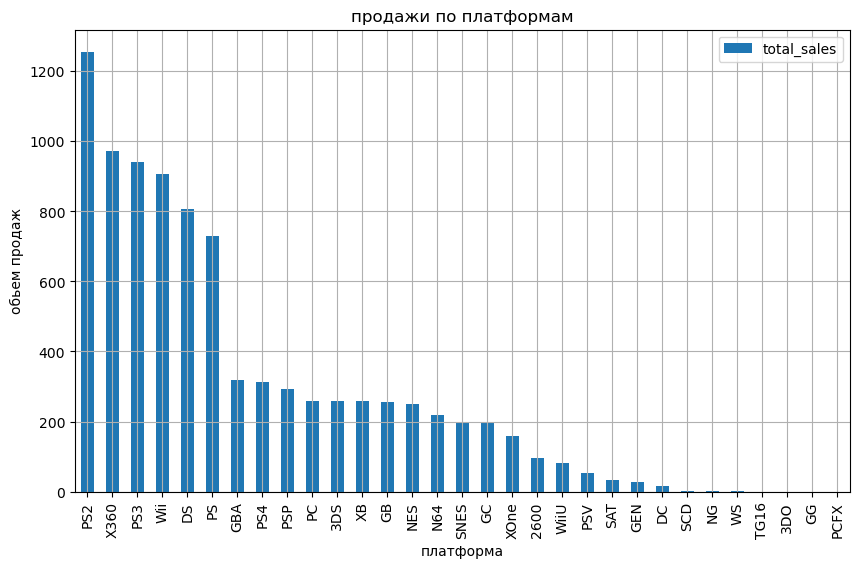

In [25]:
data.pivot_table(
    index='platform', values='total_sales', aggfunc='sum'
).sort_values(
    by='total_sales', ascending=False
).plot(
    title='продажи по платформам',
    xlabel='платформа',ylabel='обьем продаж',
    figsize=(10, 6), kind='bar', grid=True 
)
plt.show()

Исходя из графика можно отследить доминацию playstation 

### рассмотрим топ-3 платформы

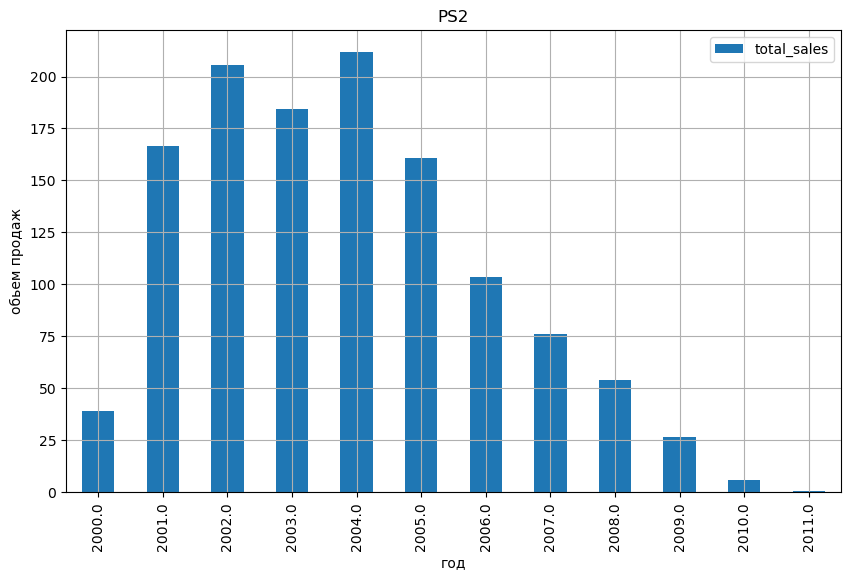

In [26]:
data.query(
    'platform == "PS2"'
).pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum'
).plot(
    title='PS2',
    xlabel='год',ylabel='обьем продаж',
    figsize=(10, 6), kind='bar', grid=True 
)
plt.show()

Консоль появилась в 2000 к 2011 году обьем продаж практически приравнялся к 0. После 5-ти лет выпуска интерес пошел на спад, можно связать с появлением X360 - нового поколения консолей

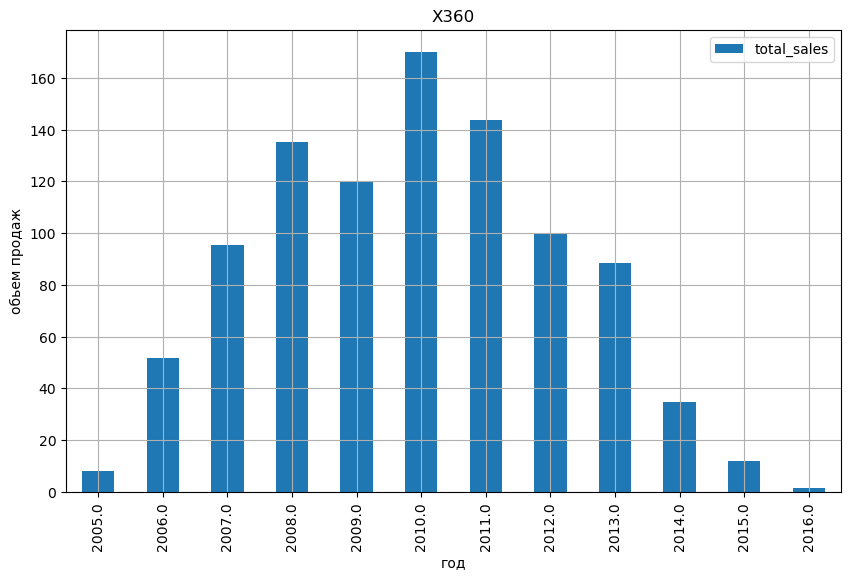

In [27]:
data.query(
    'platform == "X360"'
).pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum'
).plot(
    title='X360',
    xlabel='год',ylabel='обьем продаж',
    figsize=(10, 6), kind='bar', grid=True 
)
plt.show()

Консоль появилась в 2005 к 2016 году обьем продаж практически приравнялся к 0. После 6-ти лет выпуска интерес пошел на спад

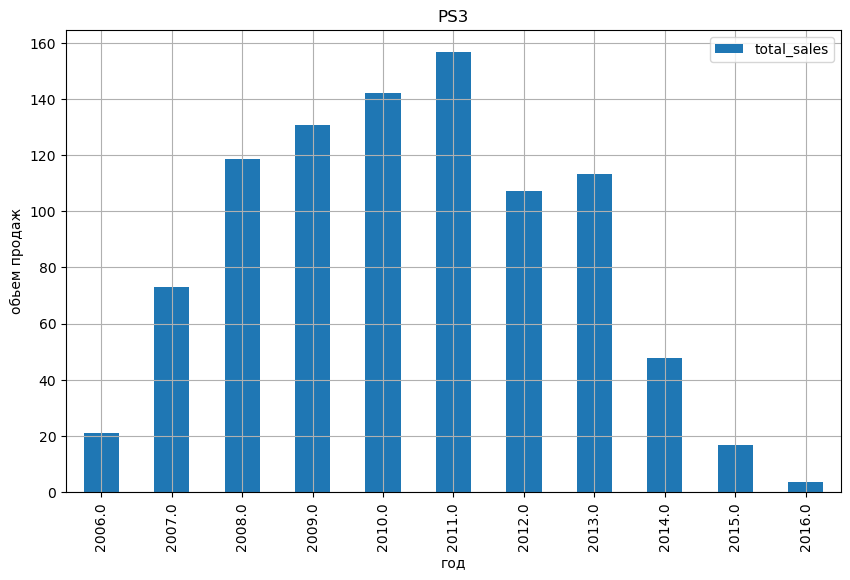

In [28]:
data.query(
    'platform == "PS3"'
).pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum'
).plot(
    title='PS3',
    xlabel='год',ylabel='обьем продаж',
    figsize=(10, 6), kind='bar', grid=True 
)
plt.show()

Консоль появилась в 2006, к 2016 году обьем продаж практически приравнялся к 0. После 6-ти лет выпуска интерес пошел на спад. Можно сделать вывод что жизненный цикл консолей составляет примерно 11 лет

###  построение прогноза на 2017 год 

актуальным периодом предлагаю считать год выхода консолей-лидеров рынка (2013)

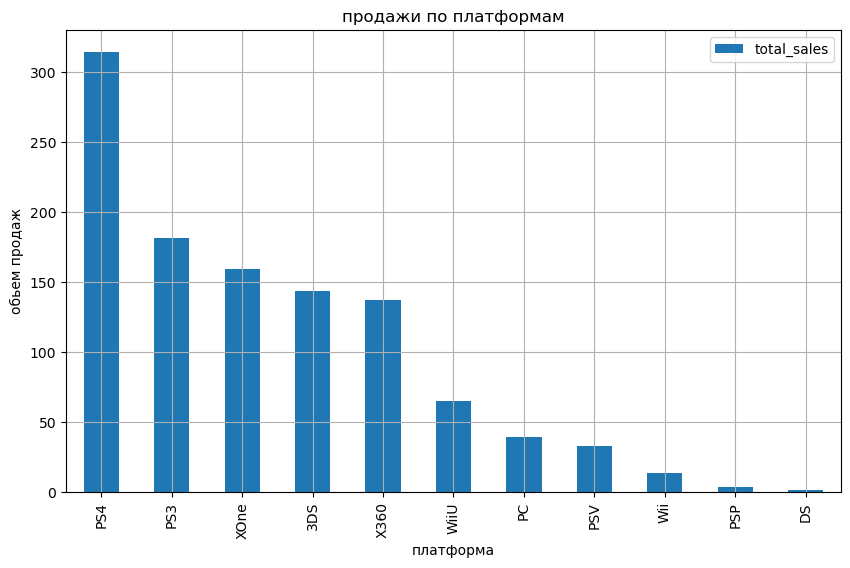

In [29]:
data.query(
    'year_of_release >= 2013'
).pivot_table(
    index='platform', values='total_sales', aggfunc='sum'
).sort_values(
    by='total_sales', ascending=False
).plot(
    title='продажи по платформам',
    xlabel='платформа',ylabel='обьем продаж',
    figsize=(10, 6), kind='bar', grid=True 
)
plt.show()

Исходя из графика лидерами являются PS4, PS3 и XOne. Сначала сравним текущие поколения консолей, затем пастген

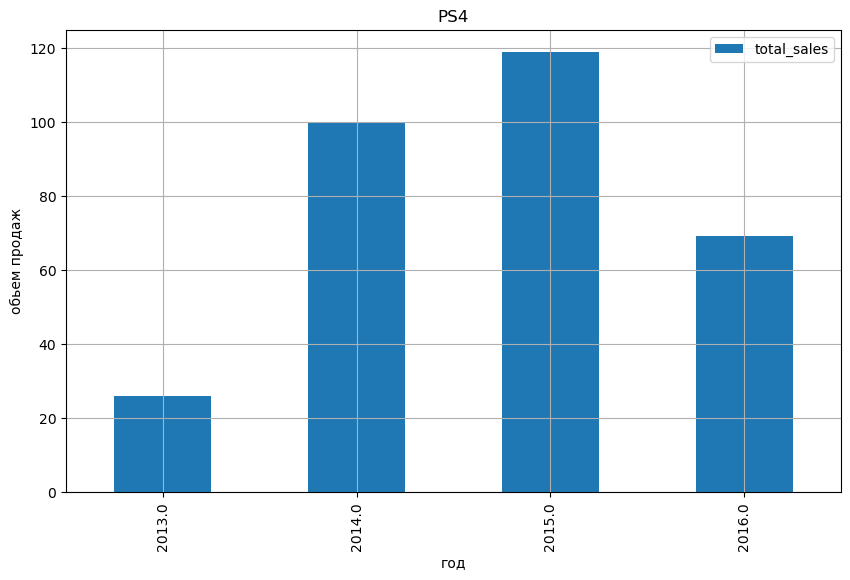

In [30]:
data.query(
    'platform == "PS4"'
).pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum'
).plot(
    title='PS4',
    xlabel='год',ylabel='обьем продаж',
    figsize=(10, 6), kind='bar', grid=True 
)
plt.show()

В период с 2013 по 2014 год наблюдаем экстенсивный рост и возрастающий тренд, это связано с запуском консоли (консоль была выпущена в ноябре 2013), с момента релиза не прошло полных 6 лет, поэтому можно предположить рост. Данные за 2016 так же не я вляются полными

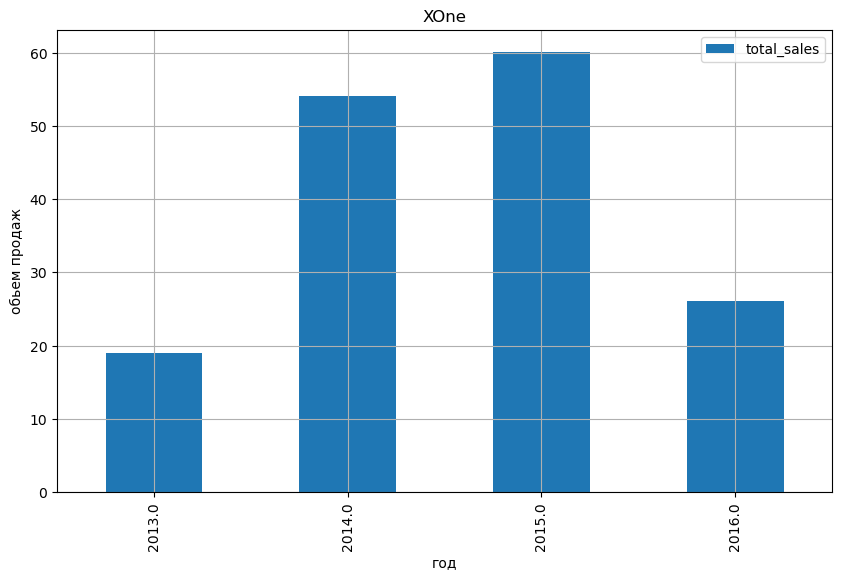

In [31]:
data.query(
    'platform == "XOne"'
).pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum'
).plot(
    title='XOne',
    xlabel='год',ylabel='обьем продаж',
    figsize=(10, 6), kind='bar', grid=True 
)
plt.show()

Такая же картина с XOne, предполагаю рост в последующий год

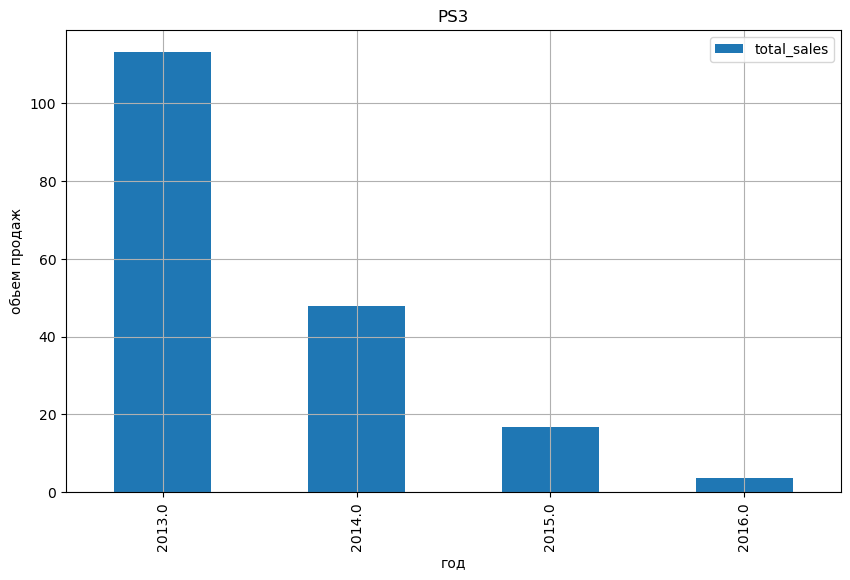

In [32]:
data.query(
    'year_of_release >= 2013'
).query(
    'platform == "PS3"'
).pivot_table(
    index='year_of_release', values='total_sales', aggfunc='sum'
).plot(
    title='PS3',
    xlabel='год',ylabel='обьем продаж',
    figsize=(10, 6), kind='bar', grid=True 
)
plt.show()

В случае с PS3 наблюдаем нисходящий тренд, логично предположить что продажи не увеличатся

### Ящик с усами по глобальным продажам

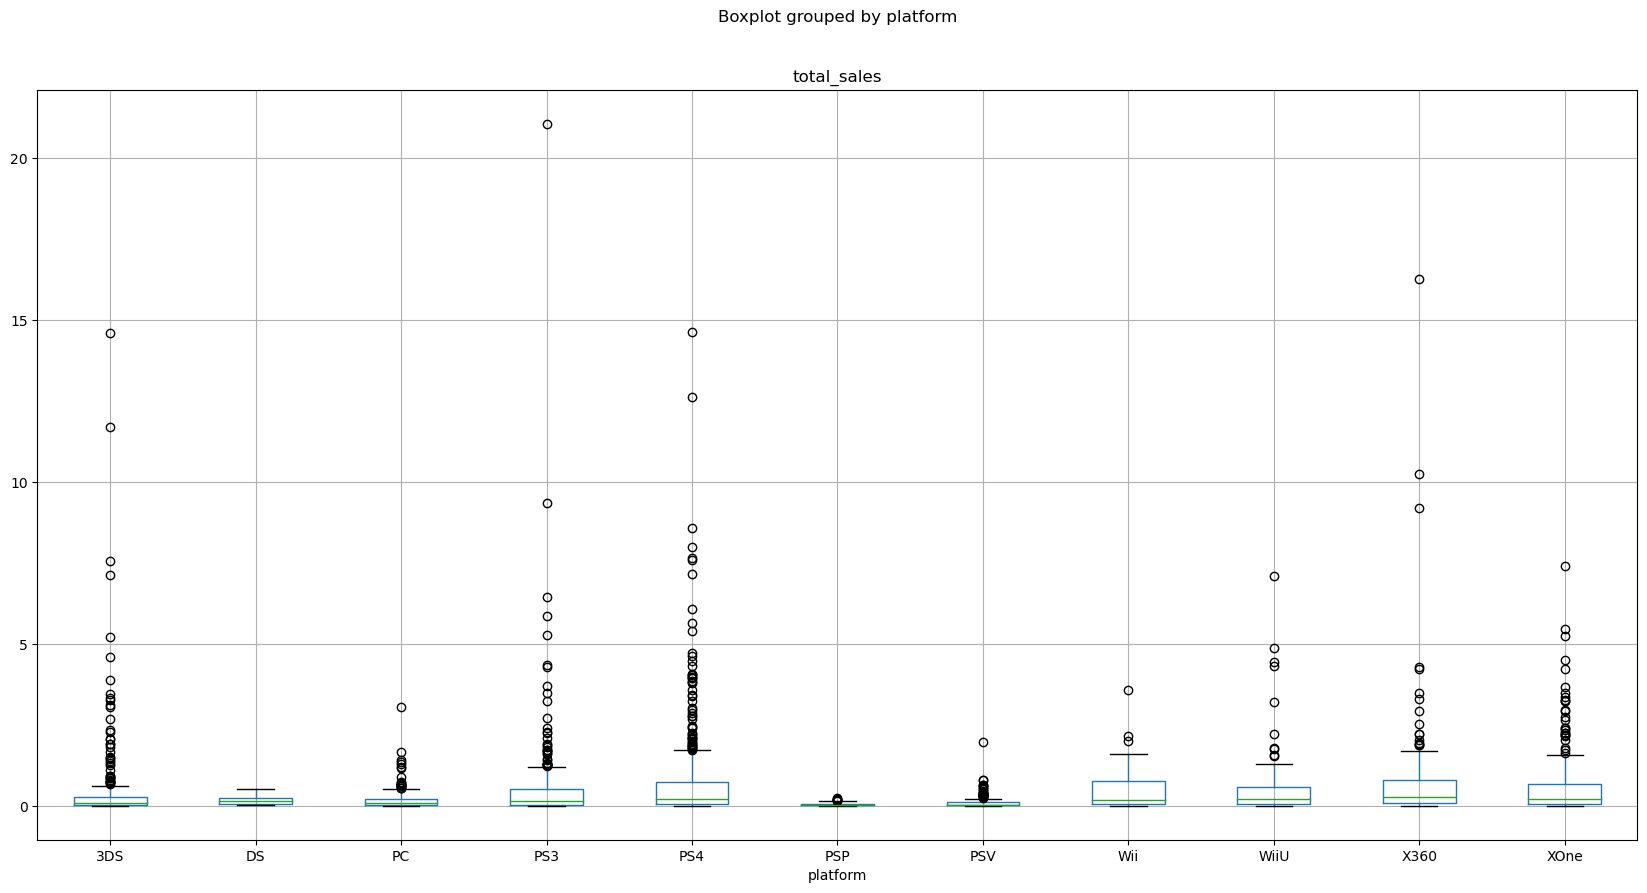

In [33]:
data_2 = data.query('year_of_release >= 2013')
platforms = ['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP', 'DS']

data_2.query(
    'platform in @platforms'
).boxplot(
    column='total_sales', by='platform', 
    figsize=(20, 10)
)
plt.show()

График без масштабирования, чтобы можно было оценить выбросы

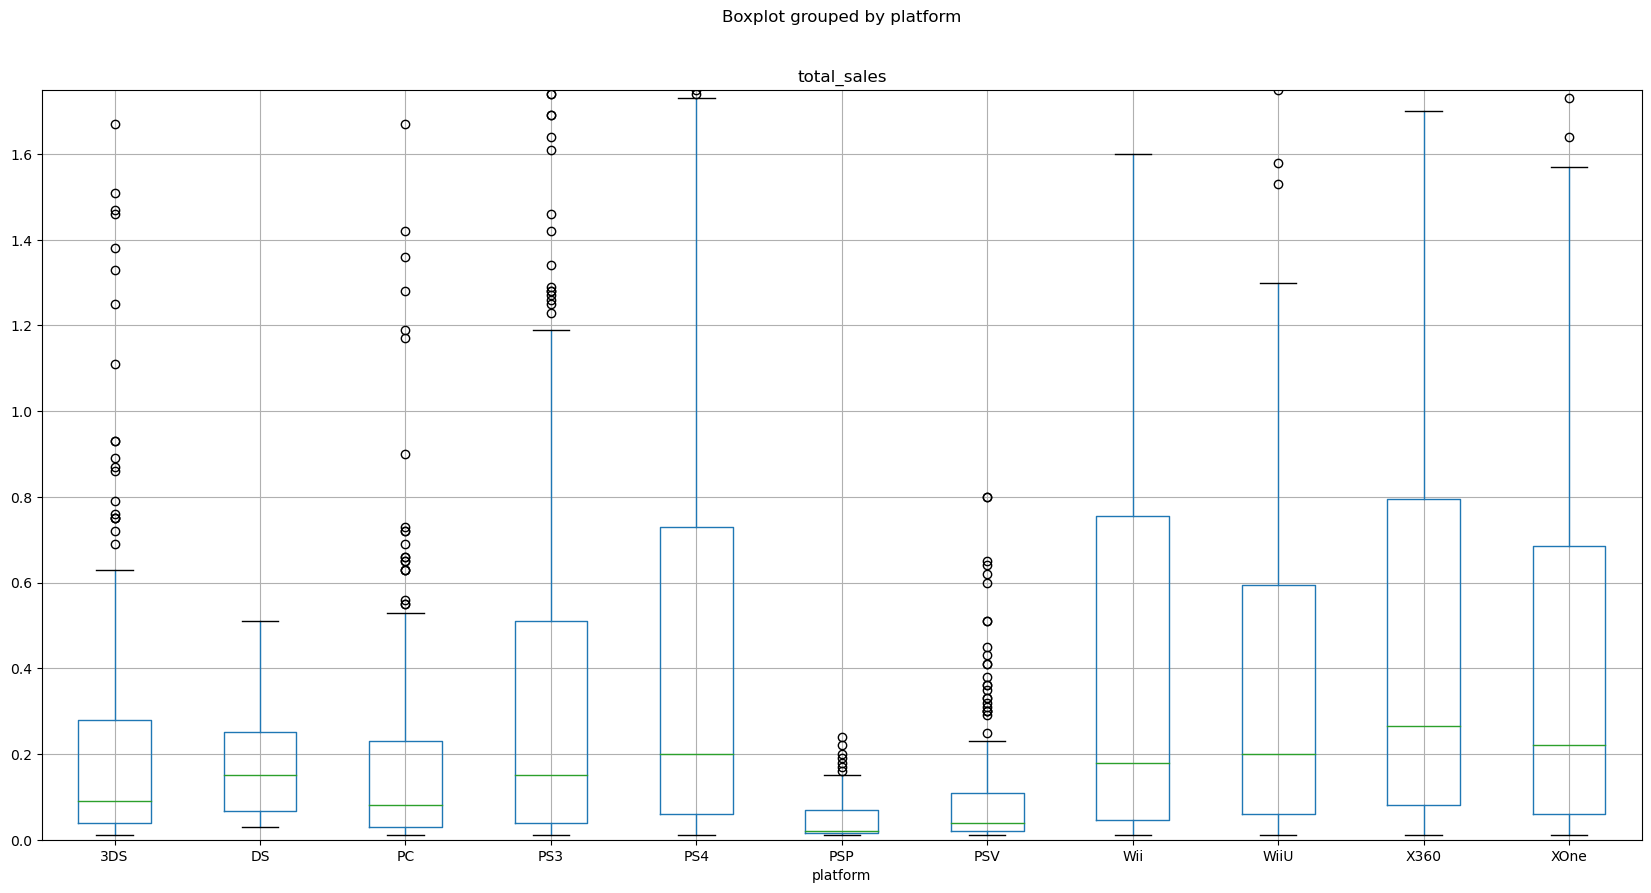

In [34]:
platforms = ['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV', 'Wii', 'PSP', 'DS']

data_2.query(
    'platform in @platforms'
).boxplot(
    column='total_sales', by='platform', 
    figsize=(20, 10)
)
plt.ylim(0, 1.75)
plt.show()

График с масштабированием, на котором отчетливо видны медиана и квартили

Тут выделяются оба Xbox, предпологаю это потому, что они вышли раньше и игр на них больше

Я тут пытался масштабировать пр помощи ylim, медианы остаются равны друг другу. Переделал графики

Судя по графику можно выделить трех лидеров рынка: Playstation, Microsoft, Nintendo их медианные показатели выше конкурентов

### Влияние отзывов на продажи

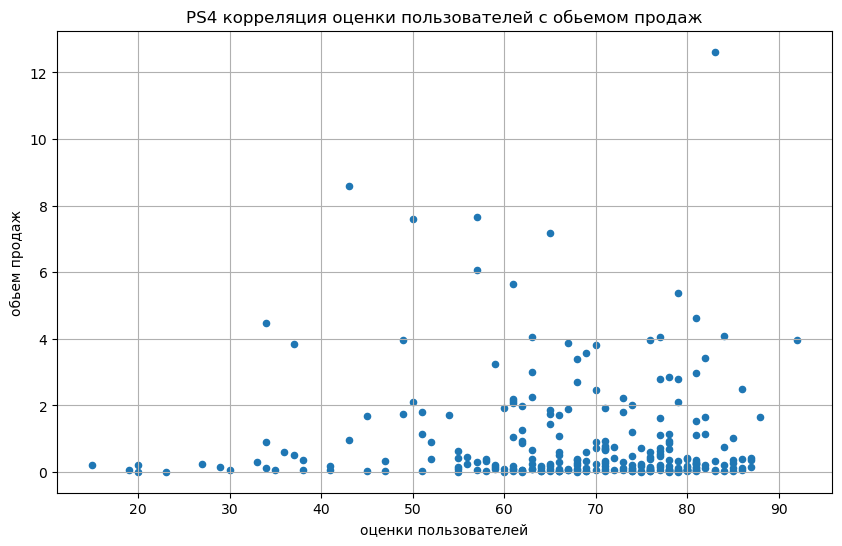

корреляция оценки пользователей с обьемом продаж: -0.031957110204556466


In [35]:
data_2.query(
    'platform == "PS4"'
).plot(
    title='PS4 корреляция оценки пользователей с обьемом продаж',
    x='user_score', y='total_sales',
    xlabel='оценки пользователей',ylabel='обьем продаж',
    figsize=(10, 6), kind='scatter', grid=True 
)
plt.show()
print('корреляция оценки пользователей с обьемом продаж:'\
      ,data.query('platform == "PS4"')['user_score'].corr(data.query('platform == "PS4"')['total_sales']))

Корреляция отрицательная, пользователи намеренно занижают оценки

На пользовательскую оценку влияет больше внешних факторов, чем на оценку критиков. Пользователи по сговору могут занижать оценки игре, во вред издателю, из-за неоправдавшихся ожиданий, в том числе если эти ожидания созданы рекламной кампанией

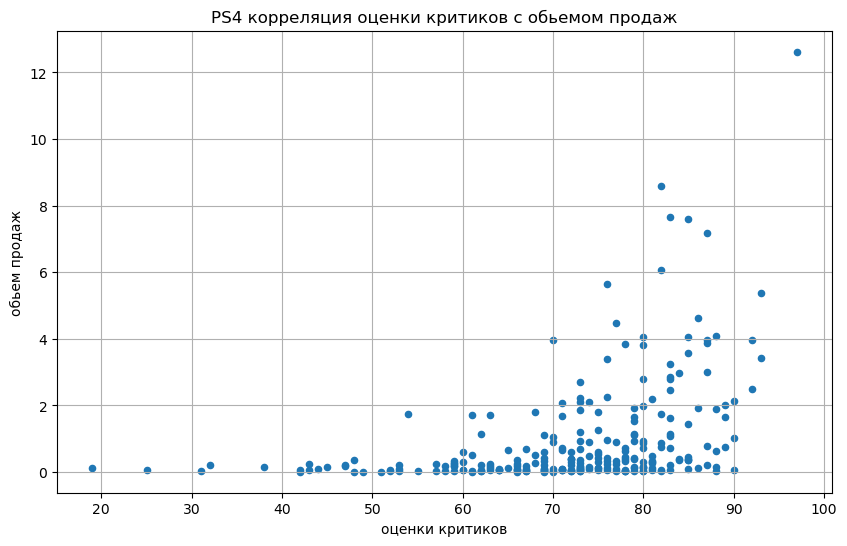

корреляция оценки критиков с обьемом продаж: 0.40656790206178145


In [36]:
data_2.query(
    'platform == "PS4"'
).plot(
    title='PS4 корреляция оценки критиков с обьемом продаж',
    x='critic_score', y='total_sales',
    xlabel='оценки критиков',ylabel='обьем продаж',
    figsize=(10, 6), kind='scatter', grid=True 
)
plt.show()
print('корреляция оценки критиков с обьемом продаж:'\
      ,data.query('platform == "PS4"')['critic_score'].corr(data.query('platform == "PS4"')['total_sales']))

В случае с критиками корреляция положительна, но она все равно не очень значима

### Соотнесем выводы с XOne

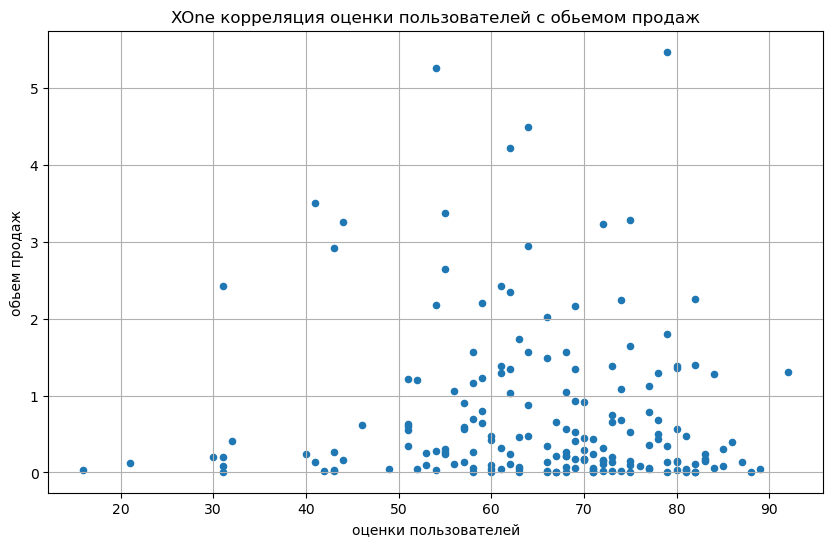

корреляция оценки пользователей с обьемом продаж: -0.0689250532827942


In [37]:
data_2.query(
    'platform == "XOne"'
).plot(
    title='XOne корреляция оценки пользователей с обьемом продаж',
    x='user_score', y='total_sales',
    xlabel='оценки пользователей',ylabel='обьем продаж',
    figsize=(10, 6), kind='scatter', grid=True 
)
plt.show()
print('корреляция оценки пользователей с обьемом продаж:'\
      ,data.query('platform == "XOne"')['user_score'].corr(data.query('platform == "XOne"')['total_sales']))

Ситуация еще хуже чем с PS4

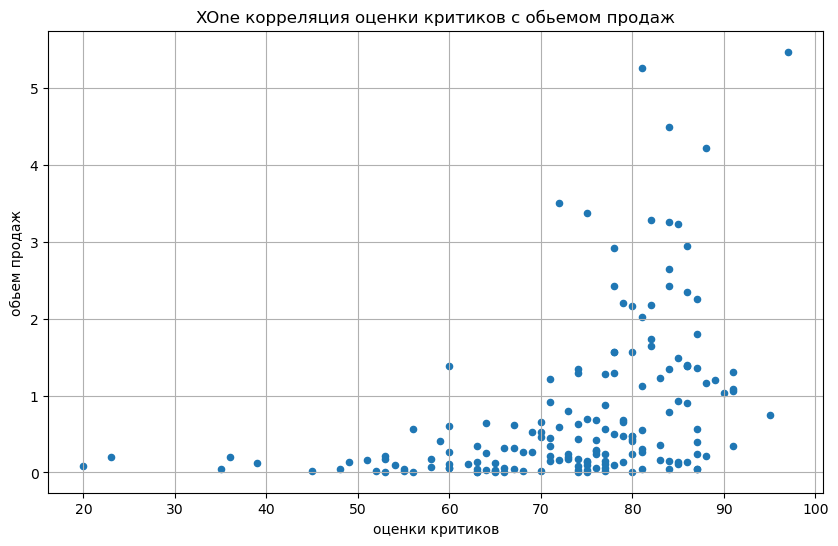

корреляция оценки критиков с обьемом продаж: 0.4169983280084016


In [38]:
data_2.query(
    'platform == "XOne"'
).plot(
    title='XOne корреляция оценки критиков с обьемом продаж',
    x='critic_score', y='total_sales',
    xlabel='оценки критиков',ylabel='обьем продаж',
    figsize=(10, 6), kind='scatter', grid=True 
)
plt.show()
print('корреляция оценки критиков с обьемом продаж:'\
      ,data.query('platform == "XOne"')['critic_score'].corr(data.query('platform == "XOne"')['total_sales']))

Тут данные схожи с PS4

Сравнительный анализ подтвердил предыдущие выводы, согласно коэффициенту корреляции Пирсона, значимой линейной корреляции не наблюдается. 

Оценки критиков имеют слабую корреляцию с общим обьемом продаж

Оценки пользователей имеют отрицательную корреляцию с общим обьемом продаж

### Общее распределение игр по жанрам

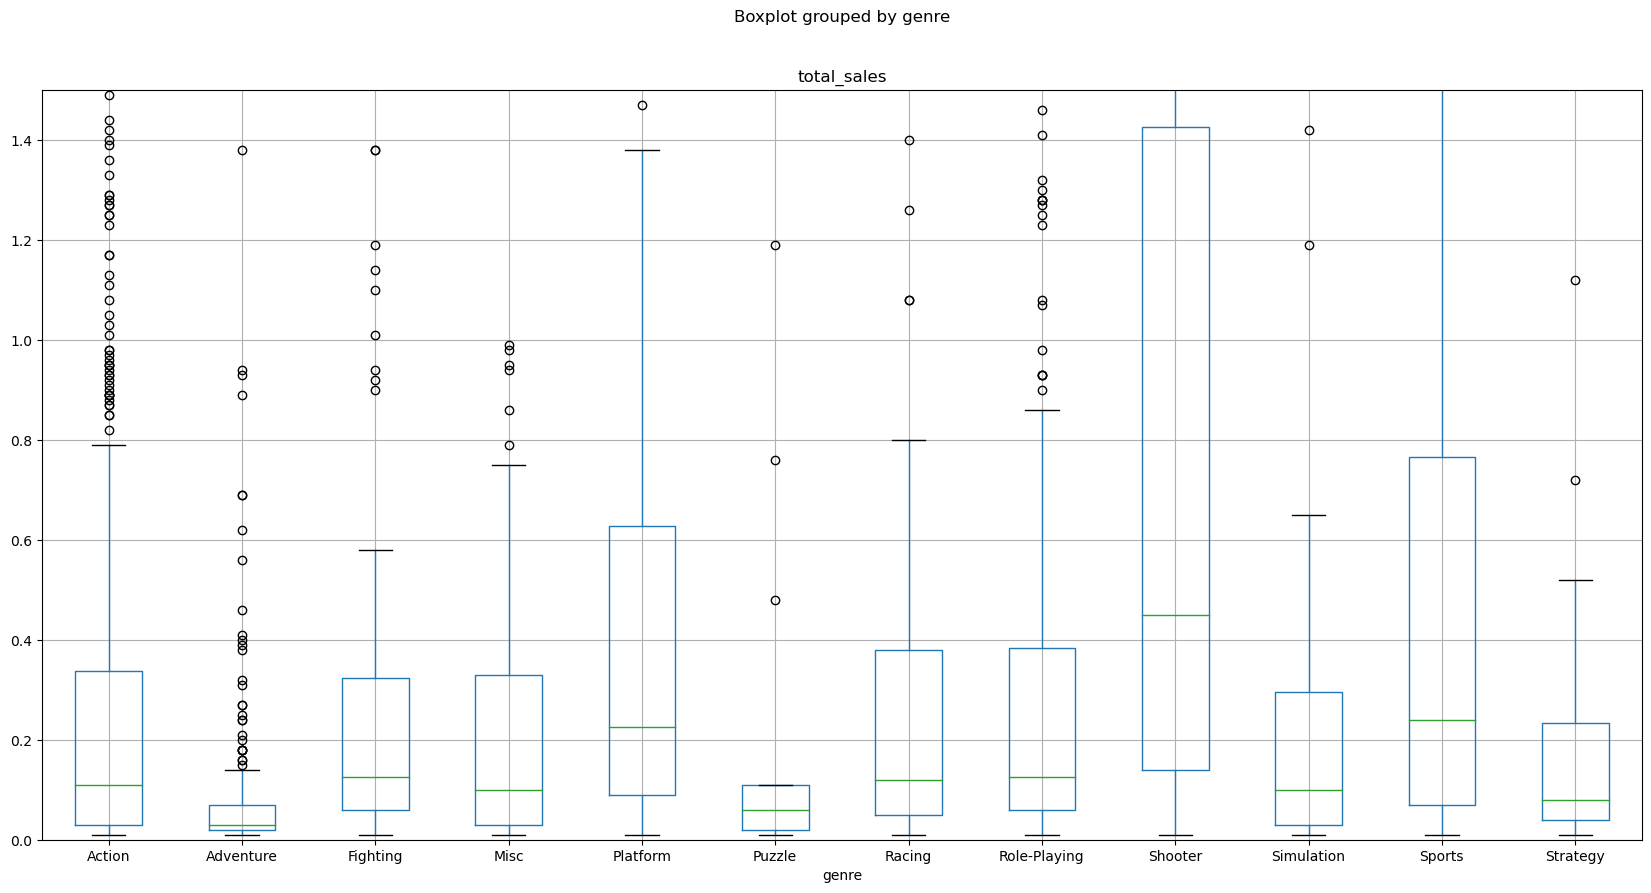

In [39]:
data_2.query(
    'platform in @platforms'
).boxplot(
column='total_sales', by='genre', 
    figsize=(20, 10)
)
plt.ylim(0, 1.5)
plt.show()

Топ-3 жанра (по медиане): шутеры, платформеры и спортивные игры

In [40]:
data_pivot = data_2.pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'count'])
data_pivot.columns = ['всего продаж', 'кол-во игр']
data_pivot.sort_values(by='всего продаж', ascending=False)

,всего продаж,кол-во игр
genre,,
Action,321.87,766
Shooter,232.98,187
Sports,150.65,214
Role-Playing,145.89,292
Misc,62.82,155
Platform,42.63,74
Racing,39.89,85
Fighting,35.31,80
Adventure,23.64,245


самые продаваемые жанры это экшен, спортивные игры и шутеры

# Составление портрета пользователя по регионам

### самые популярные платформы топ-5

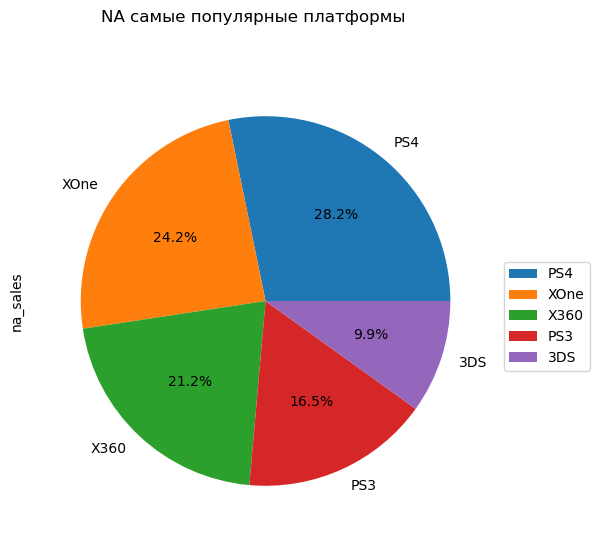

In [41]:
data_2.groupby(
    by='platform'
).agg(
    {'na_sales':'sum'}
).sort_values(
    by='na_sales', ascending=False
).head(
    
).plot(
    title='NA самые популярные платформы',
    figsize=(10, 6),kind='pie',subplots=True, autopct='%.1f%%'
)
plt.legend(bbox_to_anchor=(1, 0.6))
plt.show()

В Северной Америке пальму первенства делят XOne и PS4, их совокупные продажи составляют половину от всех продаж консолей из топа

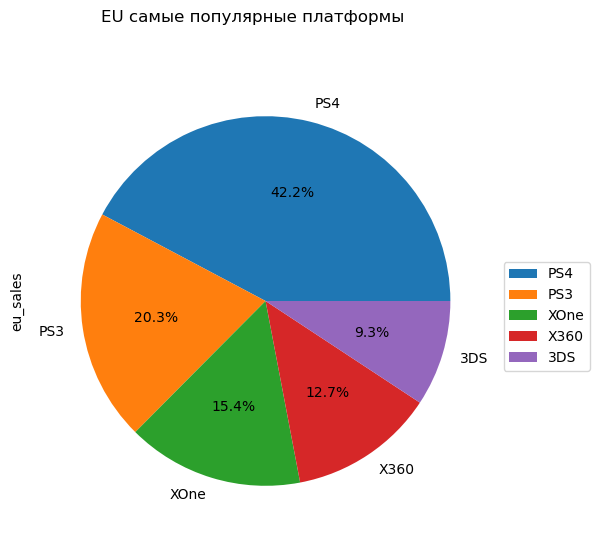

In [42]:
data_2.groupby(
    by='platform'
).agg(
    {'eu_sales':'sum'}
).sort_values(
    by='eu_sales', ascending=False
).head(
    
).plot(
    title='EU самые популярные платформы',
    figsize=(10, 6),kind='pie',subplots=True, autopct='%.1f%%'
)
plt.legend(bbox_to_anchor=(1, 0.6))
plt.show()

В Европе доминирует интерес к Playstation, совокупный обьем продаж консолей составляет больше половины от общего обьема

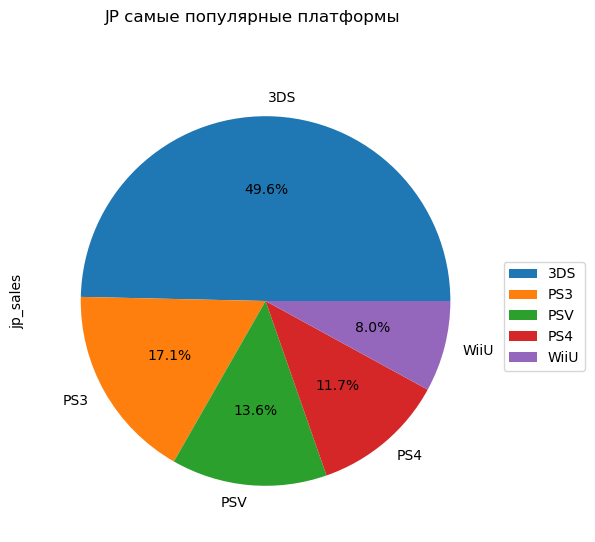

In [43]:
data_2.groupby(
    by='platform'
).agg(
    {'jp_sales':'sum'}
).sort_values(
    by='jp_sales', ascending=False
).head(
    
).plot(
    title='JP самые популярные платформы',
    figsize=(10, 6),kind='pie',subplots=True, autopct='%.1f%%'
)
plt.legend(bbox_to_anchor=(1, 0.6))
plt.show()

Япония поддерживает местного производителя, лидерами являются 3DS и PS3

### самые популярные жанры топ-5

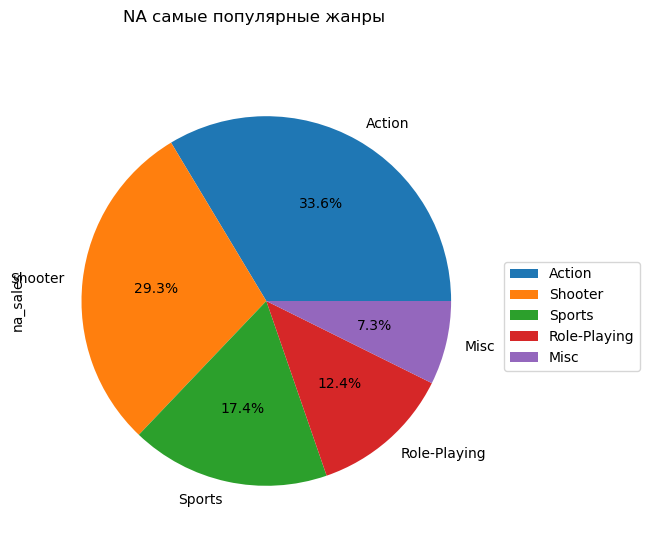

In [44]:
data_2.groupby(
    by='genre'
).agg(
    {'na_sales':'sum'}
).sort_values(
    by='na_sales', ascending=False
).head(
    
).plot(
    title='NA самые популярные жанры',
    figsize=(10, 6),kind='pie',subplots=True, autopct='%.1f%%'
)
plt.legend(bbox_to_anchor=(1, 0.6))
plt.show()

В Америке самыми популярными жанрами являются экшен и шутеры, экшен все же доминирует

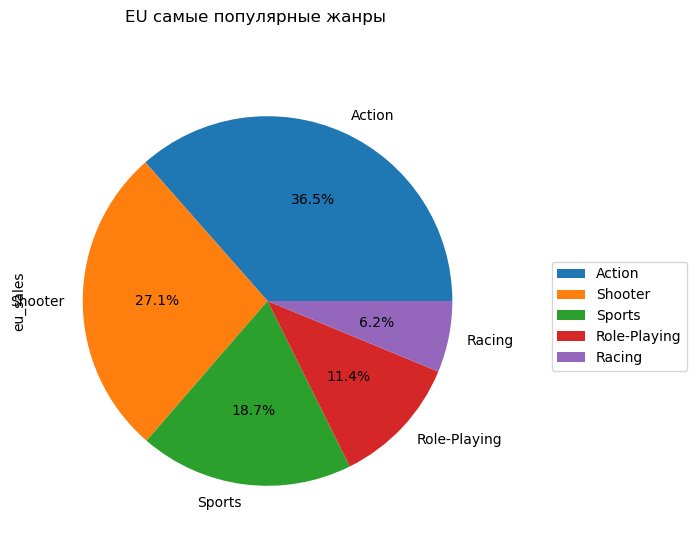

In [45]:
data_2.groupby(
    by='genre'
).agg(
    {'eu_sales':'sum'}
).sort_values(
    by='eu_sales', ascending=False
).head(
    
).plot(
    title='EU самые популярные жанры',
    figsize=(10, 6),kind='pie',subplots=True, autopct='%.1f%%'
)
plt.legend(bbox_to_anchor=(1.1, 0.6))
plt.show()

В Европе похожая ситуация, экшены еще популярнее, чем в Америке

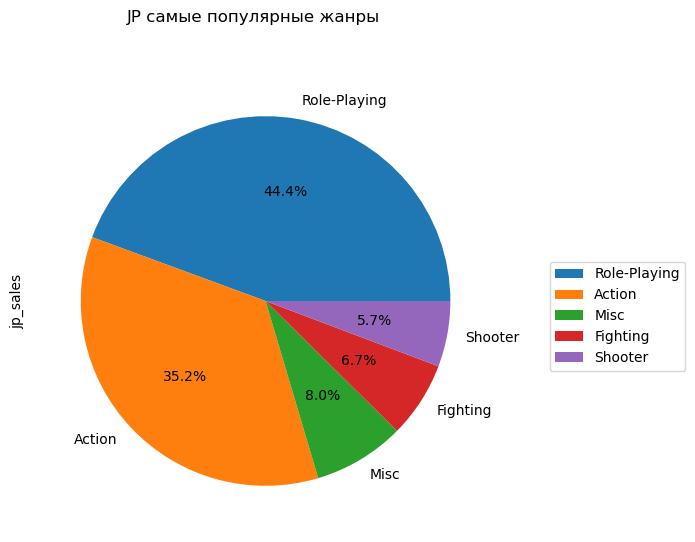

In [46]:
data_2.groupby(
    by='genre'
).agg(
    {'jp_sales':'sum'}
).sort_values(
    by='jp_sales', ascending=False
).head(
    
).plot(
    title='JP самые популярные жанры',
    figsize=(10, 6),kind='pie',subplots=True, autopct='%.1f%%'
)
plt.legend(bbox_to_anchor=(1.1, 0.6))
plt.show()

В Японии иная ситуация, ролевые игры гораздо популярнее, экшкен на втором месте

### влияние рейтинга ESRB на продажи по регионам

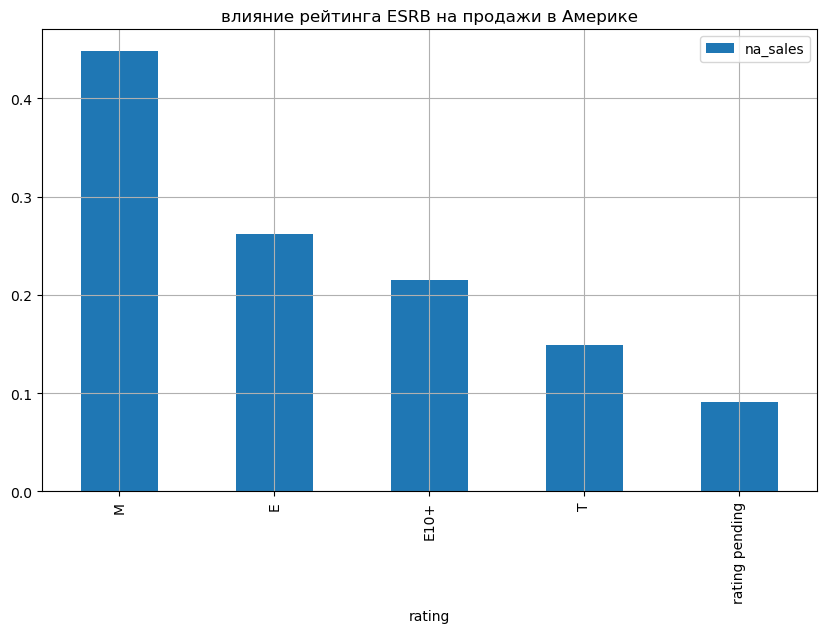

In [47]:
data_2.pivot_table(
    index='rating', values='na_sales'
).sort_values(
    by='na_sales', ascending=False
).plot(
    title='влияние рейтинга ESRB на продажи в Америке',
    figsize=(10, 6),kind='bar', grid=True
)
plt.show()

Исправил df в предобработке

Наибольшее число продаж имеют игры с взрослым рейтингом 

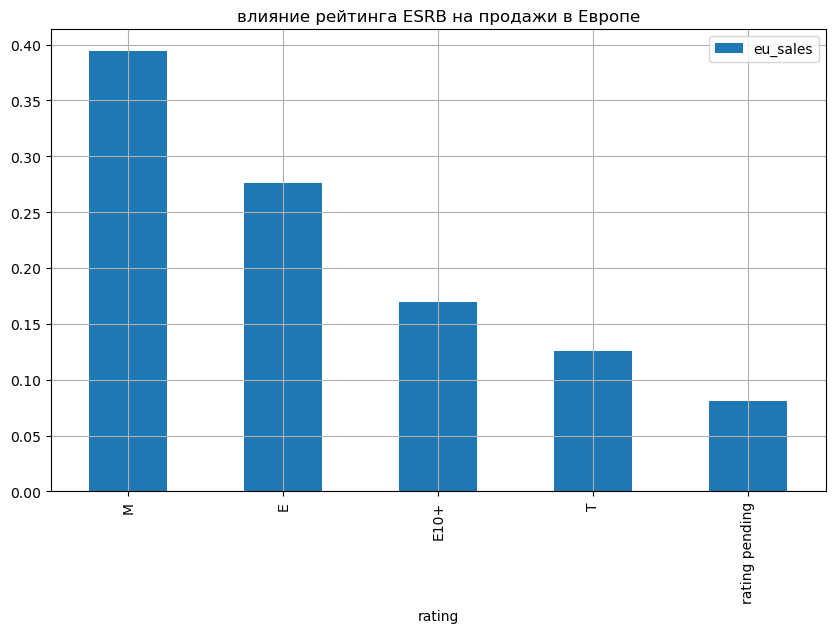

In [48]:
data_2.pivot_table(
    index='rating', values='eu_sales'
).sort_values(
    by='eu_sales', ascending=False
).plot(
    title='влияние рейтинга ESRB на продажи в Европе',
    figsize=(10, 6),kind='bar', grid=True
)
plt.show()

В Европе популярны игры для взрослых и детей старше 10 лет

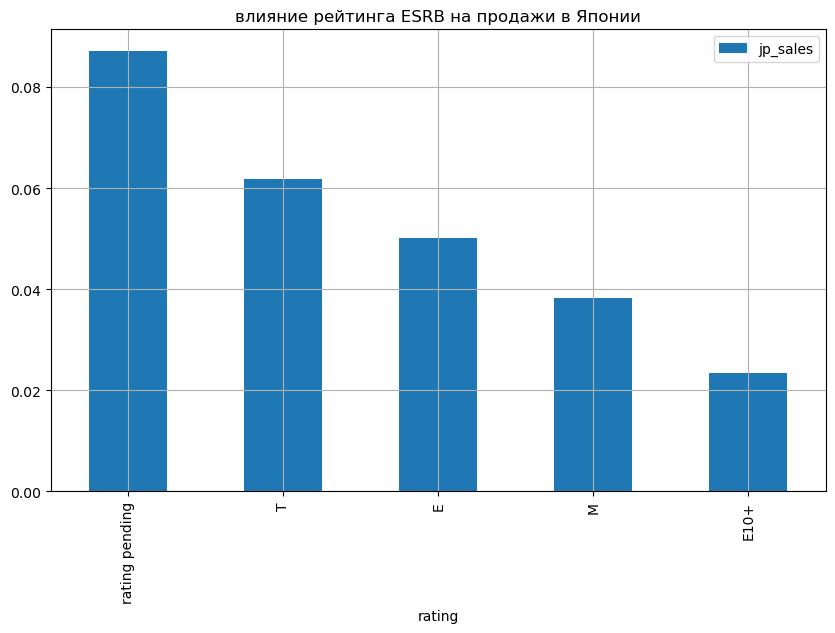

In [49]:
data_2.pivot_table(
    index='rating', values='jp_sales'
).sort_values(
    by='jp_sales', ascending=False
).plot(
    title='влияние рейтинга ESRB на продажи в Японии',
    figsize=(10, 6),kind='bar', grid=True
)
plt.show()

В Японии иная ситуация, тут более популярны игры без возрастных ограничений и на первом месте игры без рейтинга

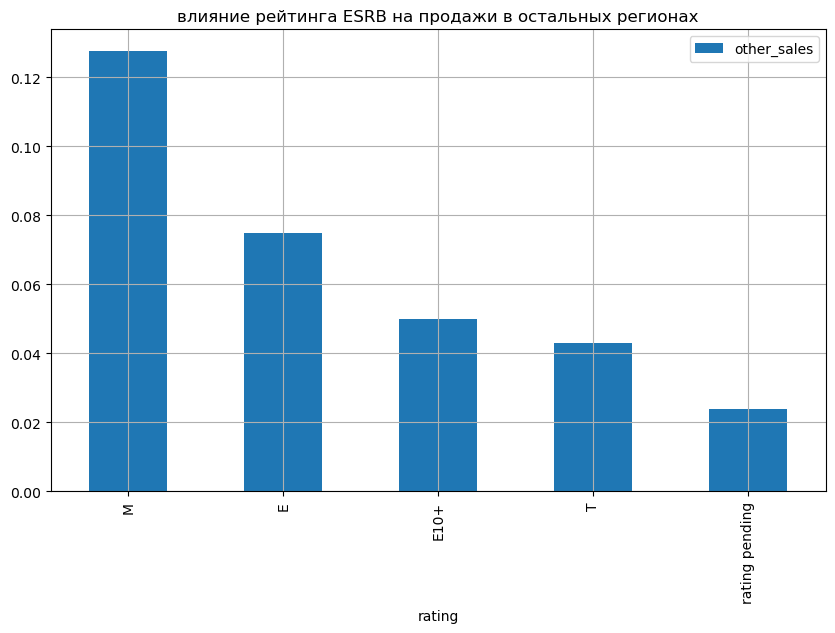

In [50]:
data_2.pivot_table(
    index='rating', values='other_sales'
).sort_values(
    by='other_sales', ascending=False
).plot(
    title='влияние рейтинга ESRB на продажи в остальных регионах',
    figsize=(10, 6),kind='bar', grid=True
)
plt.show()

Остальной мир следует тенденциям европы и америки, тут схожая картина

Топ-3 рейтинга в Америке: M, E, E10+

Топ-3 рейтинга в Европе: M, E, E10+

Топ-3 рейтинга в Японии: T, E, M

Топ-3 рейтинга в остальном мире: M, E, E10+

### Entertainment Software Rating Board

«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими. 


   «E» («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. 
   
   «E10+» («Everyone 10 and older») — «Для всех старше 10 лет»: Возрастная категория — от 10 лет. Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови.
   
   «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

   «M» («Mature») — «От 17 лет»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.

   «AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением.

   «RP» («Rating Pending»“) — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официального релиза.

   «K-A» («Kids to Adults»)— «Для детей и взрослых»: Содержание игры вполне подходит для возрастной категории от 6 лет и старше. Такие игры подходят для всех возрастов. Они могут содержать минимальное насилие или немного грубый разговорный язык.

# Проверка гипотез

H0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H1: средние пользовательские рейтинги платформ Xbox One и PC различные

In [51]:
XOne = data.query('platform == "XOne" and user_score > 0')['user_score']
PC = data.query('platform == "PC" and user_score > 0')['user_score']

alpha = 0.01 #0.05

results = st.ttest_ind(XOne, PC)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.3896435533548407e-05
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги платформ Xbox One и PC различаются

H0: средние пользовательские рейтинги жанров Action и Sports разные

H1: средние пользовательские рейтинги жанров Action и Sports одинаковые

In [52]:
Action = data.query('genre == "Action" and user_score > 0')['user_score']
Sports = data.query('genre == "Sports" and user_score > 0')['user_score']

alpha = 0.01 #0.05

results = st.ttest_ind(Action, Sports)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.10406951359050057
Не получилось отвергнуть нулевую гипотезу


Cредние пользовательские рейтинги жанров Action и Sports различаются

# Вывод

В ходе исследовательской работы были выполнены следующие действия: предобработаны данные, рассмотрено количество выпущенных игр по годам и платформам, построен прогноз на 2017 по консолям, выделены лидеры роста и падения, оценено влияние оценок на продажи игр, выделены самые популярные жанры, был составлен портрет пользователя по регионам и выевлено влияние рейтинга на продажи, так же проверены гипотезы

Для Американского рынка следует ориентироваться на X-Box и игры в жанре Action

Для Европейского на Playstation и Action соответственно

Для Японского на Японские консоли и Role-play

Для проведения успешной рекламной кампании следует сделать ставку на консоли нового поколения, такие как PS4 и XOne. Наиболее популярными играми на этих консолях являются экшены и шутеры, для шутеров подойдет рейтинг "M", а для экшена, оба наиболее популярных рейтинга "M" и "E". При проведении кампании следует ориентироваться на Американский и Европейский сегметы, пользовательские предпочтения в обоих регионах практически совпадают. Оценки пользователей и критиков не имеют сильной линейной корреляции с обьемом продаж, поэтому их не стоит учитывать, как и Японский сегмент, который имеет особую специфику, отличную от остального мира.